In [2]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [3]:
# Loads the training and test data sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_test_confusion_matrix = y_test

In [4]:
first_image = X_train[0, :, :]

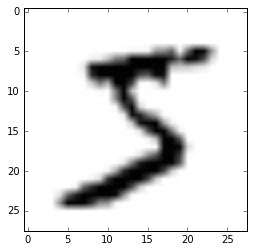

In [5]:
# To interpret the values as a 28x28 image, we need to reshape
# the numpy array, which is one dimensional.
plt.imshow(first_image, cmap=plt.cm.Greys);

In [6]:
num_classes = len(np.unique(y_train))
num_classes

10

In [7]:
# 60K training 28 x 28 (pixel) images
X_train.shape


(60000, 28, 28)

In [8]:
# 10K test 28 x 28 (pixel) images
X_test.shape

(10000, 28, 28)

In [9]:
# The training and test data sets are integers, ranging from 0 to 255.
# We reshape the training and test data sets to be a 4D tensor.
# Dimensions: num_images x 28 x 28 x 1
# The 1 is because we have a single channel (greyscale). If RGB color images, we'd have 3 channels.
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')
input_shape = (28, 28, 1)

In [10]:
# Scales the training and test data to range between 0 and 1.
max_value = X_train.max()
X_train /= max_value
X_test /= max_value

In [11]:
# The training and test labels are integers from 0 to 9 indicating the class label
(y_train, y_test)

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [12]:
# We convert the class labels to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
__________

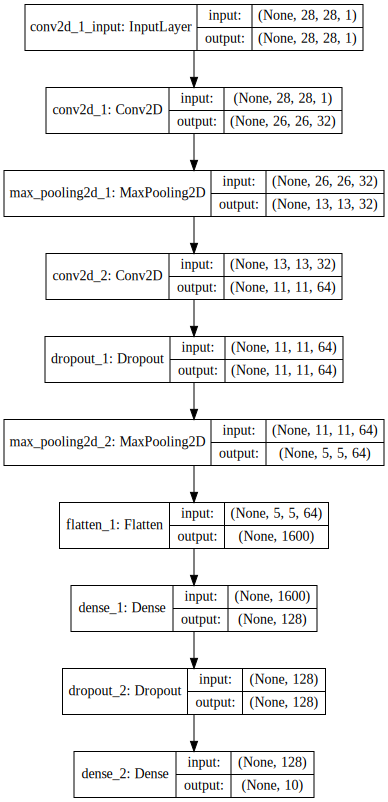

In [15]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [16]:
import json
json.loads(model.to_json())

{u'backend': u'tensorflow',
 u'class_name': u'Sequential',
 u'config': [{u'class_name': u'Conv2D',
   u'config': {u'activation': u'relu',
    u'activity_regularizer': None,
    u'batch_input_shape': [None, 28, 28, 1],
    u'bias_constraint': None,
    u'bias_initializer': {u'class_name': u'Zeros', u'config': {}},
    u'bias_regularizer': None,
    u'data_format': u'channels_last',
    u'dilation_rate': [1, 1],
    u'dtype': u'float32',
    u'filters': 32,
    u'kernel_constraint': None,
    u'kernel_initializer': {u'class_name': u'VarianceScaling',
     u'config': {u'distribution': u'uniform',
      u'mode': u'fan_avg',
      u'scale': 1.0,
      u'seed': None}},
    u'kernel_regularizer': None,
    u'kernel_size': [3, 3],
    u'name': u'conv2d_1',
    u'padding': u'valid',
    u'strides': [1, 1],
    u'trainable': True,
    u'use_bias': True}},
  {u'class_name': u'MaxPooling2D',
   u'config': {u'data_format': u'channels_last',
    u'name': u'max_pooling2d_1',
    u'padding': u'valid',

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 68us/step - loss: 0.0543 - acc: 0.9810 - val_loss: 0.0138 - val_acc: 0.9958
Epoch 2/20
48000/48000 [==============================] - 2s 52us/step - loss: 0.0185 - acc: 0.9939 - val_loss: 0.0097 - val_acc: 0.9970
Epoch 3/20
48000/48000 [==============================] - 3s 54us/step - loss: 0.0143 - acc: 0.9954 - val_loss: 0.0087 - val_acc: 0.9973
Epoch 4/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.0117 - acc: 0.9962 - val_loss: 0.0075 - val_acc: 0.9977
Epoch 5/20
48000/48000 [==============================] - 3s 53us/step - loss: 0.0099 - acc: 0.9967 - val_loss: 0.0068 - val_acc: 0.9978
Epoch 6/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.0092 - acc: 0.9970 - val_loss: 0.0061 - val_acc: 0.9979
Epoch 7/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.0081 - acc: 0.9974 - val_loss: 0.0060 - val_acc

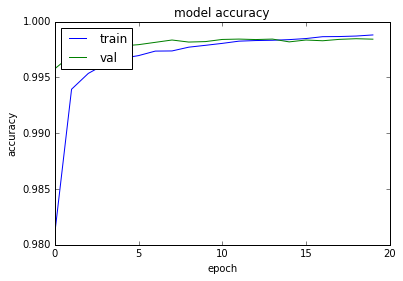

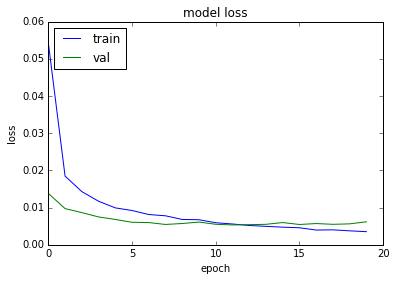

In [17]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, shuffle=True, verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:

# Evaluation on test data
#model.evaluate(X_test, y_test)
evaluation = model.evaluate(X_test, y_test, batch_size=256, verbose=1)
print('Summary: Loss over the test dataset: %.4f, Accuracy: %.4f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 0s 15us/step
Summary: Loss over the test dataset: 0.0049, Accuracy: 0.9984


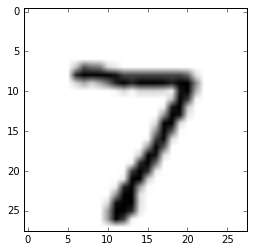

In [19]:
first_test_image = X_test[0, :]
plt.imshow(first_test_image.reshape(28, 28), cmap=plt.cm.Greys);

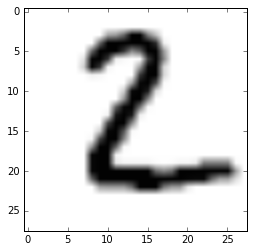

In [20]:
second_test_image = X_test[1, :]
plt.imshow(second_test_image.reshape(28, 28), cmap=plt.cm.Greys);

In [21]:
model.predict_classes(X_test[[0, 1], :])

array([7, 2])

In [22]:
from sklearn.metrics import classification_report
import numpy as np

Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       980
          1       0.99      1.00      1.00      1135
          2       1.00      0.99      0.99      1032
          3       1.00      0.99      0.99      1010
          4       0.99      1.00      0.99       982
          5       0.99      0.99      0.99       892
          6       1.00      0.99      1.00       958
          7       0.98      1.00      0.99      1028
          8       1.00      0.99      0.99       974
          9       1.00      0.98      0.99      1009

avg / total       0.99      0.99      0.99     10000



In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test_confusion_matrix , y_pred)



Confusion matrix, without normalization
[[ 977    0    0    0    1    0    1    1    0    0]
 [   0 1134    0    0    0    0    0    1    0    0]
 [   1    1 1023    0    1    0    0    6    0    0]
 [   0    0    2 1000    0    6    0    1    1    0]
 [   0    1    0    0  980    0    0    0    0    1]
 [   2    0    0    4    0  883    1    1    1    0]
 [   1    3    0    0    1    2  951    0    0    0]
 [   0    2    1    0    0    0    0 1024    1    0]
 [   4    0    2    1    0    0    0    1  964    2]
 [   0    3    0    0    9    4    0    6    1  986]]


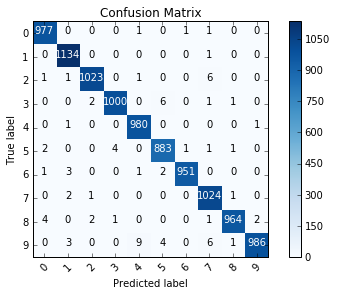

In [25]:
cm_plot_labels = ['0','1','2','3', '4','5','6','7','8','9']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')